In [1]:
#pip install seaborn


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
cars_df= pd.read_csv("Resources/CO2 Emissions_Canada.csv")
cars_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
cars_df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
numerics_df=cars_df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]]
numerics_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [7]:
cars_corr = numerics_df.corr()
#cars_corr.unstack().sort_values()
cars_corr

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


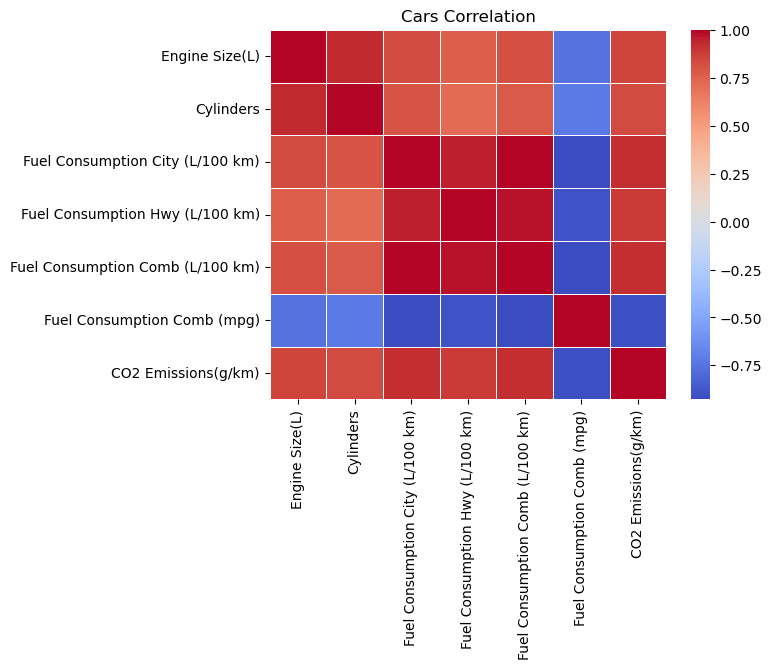

In [8]:
import matplotlib.pylab as plt

ax=sns.heatmap(cars_corr,linewidth=0.5 , cmap="coolwarm")
plt.title("Cars Correlation")
plt.show()


<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)'>

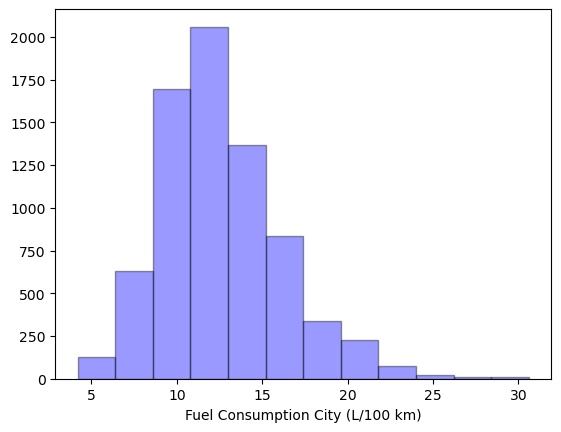

In [9]:
#Checking the normal distribution
sns.distplot(numerics_df["Fuel Consumption City (L/100 km)"], hist=True, kde=False, 
             bins=int(180/15), color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)'>

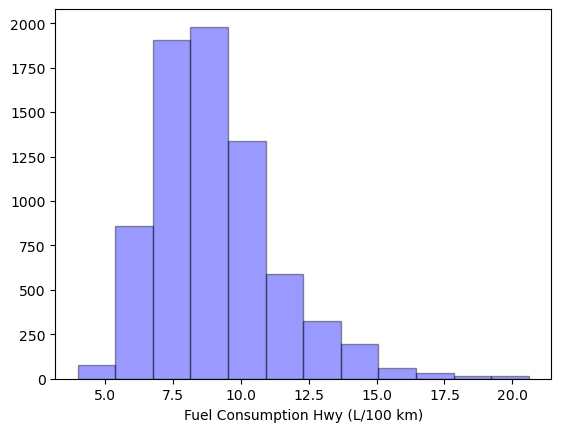

In [10]:
sns.distplot(numerics_df["Fuel Consumption Hwy (L/100 km)"], hist=True, kde=False, 
             bins=int(180/15), color = 'blue',
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

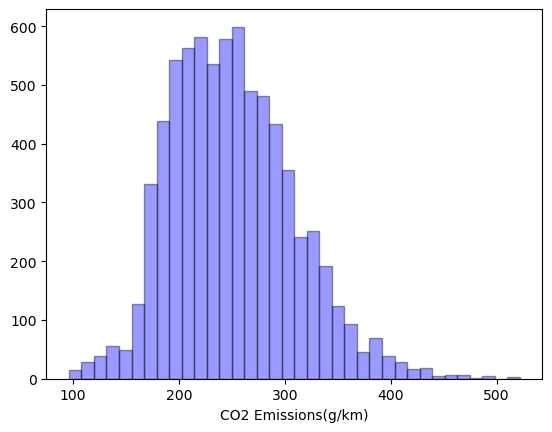

In [11]:
sns.distplot(numerics_df["CO2 Emissions(g/km)"], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


# Multiple Linear Regression 

In [12]:
#Split the data into X and y
y= numerics_df["CO2 Emissions(g/km)"]

# Separate the X variable, the features
X = numerics_df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)"]]
X.shape, y.shape

((7385, 4), (7385,))

In [13]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 1)
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((5908,), (1477,), (5908, 4), (1477, 4))

In [14]:
#Create a Linear Regression model
regr = linear_model.LinearRegression()
#Train the model on the training set
regr_model=regr.fit(X_train, y_train)

In [15]:
#Predict on the testing set
y_prediction = regr_model.predict(X_test)
y_prediction.shape

(1477,)

In [16]:
#Evaulate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.8797165993674141
Mean Squared Error: 409.5475270722951
Mean Absolute Error: 13.499776395662566


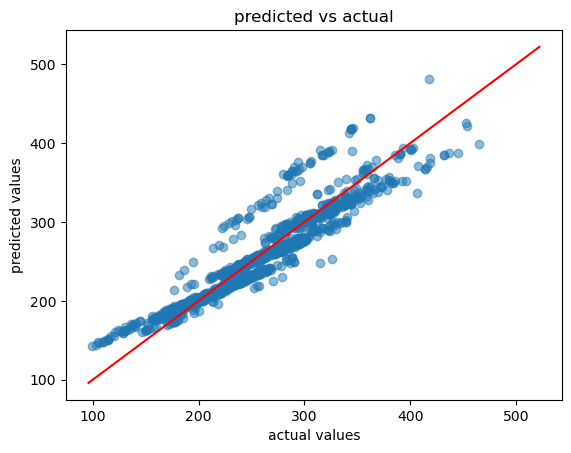

In [17]:
#plot the predicted vs actual values
plt.scatter(y_test, y_prediction, alpha= 0.5 )
plt.plot([y.min(),y.max()], [y.min(),y.max()], color = "red") 
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("predicted vs actual")
plt.show() 

[Text(0.5, 0, ' y prediction'),
 Text(0, 0.5, 'residual'),
 Text(0.5, 1.0, 'residuals')]

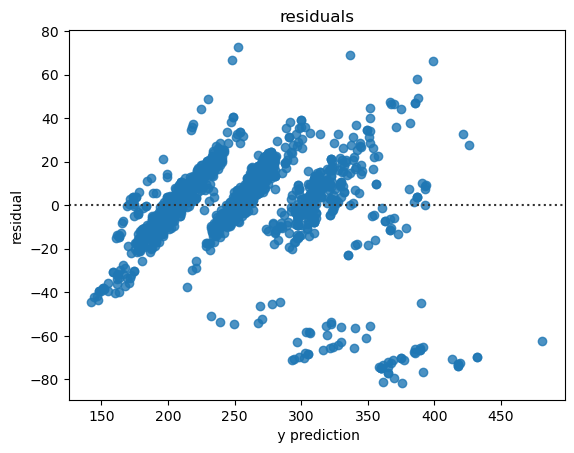

In [71]:
#plot the residuals
gfg=sns.residplot(x = y_prediction, y = y_test-y_prediction)

gfg.set(xlabel =" y prediction",ylabel= "residual", title= "residuals")
    


In [72]:
#Print regression coefficients and intercept
print("Coefficients: ",  regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients:  [5.75078492 6.65332716 6.8317655  6.48691586]
Intercept: 50.52369559592012


In [73]:
#predict the CO2 emission of a car; 
#where the Engine Size(L): 2.4,Cylinders: 4 ,Fuel Consumption City (L/100 km):11.2, Fuel Consumption Hwy (L/100 km): 7.7
predictedCO2 = regr_model.predict([[2.4, 4, 11.2, 7.7]])
print(predictedCO2)

[217.40391376]


In [74]:
#predict the CO2 emission of a car; 
#where the Engine Size(L): 3.5, Cylinders: 6 ,Fuel Consumption City (L/100 km):12.7, Fuel Consumption Hwy (L/100 km): 9.1
predictedCO2 = regr_model.predict([[3.5, 6, 12.7, 9.1]])
print(predictedCO2)

[256.36576195]


In [75]:
predictedCO2 = regr_model.predict([[2, 4, 12.2, 8.7]])
print(predictedCO2)

[228.42228115]
